# Logic testing (will be deleted)

In [1]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *


# River Normale

In [2]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                          ..................}                                   
                          .@..............`                                     
                          ..............`                                       
                          ...`..` ..........}                                   
                          .

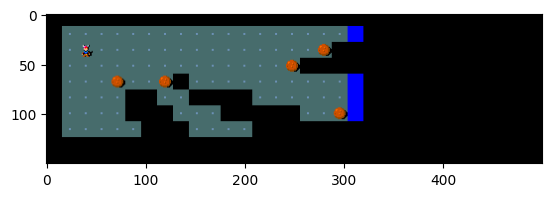

In [3]:
plt.imshow(state['pixel'][100:250, 400:900]) #Immagine ristretta con range [y][x]

In [4]:
game_map = state['chars']
game = state['pixel']

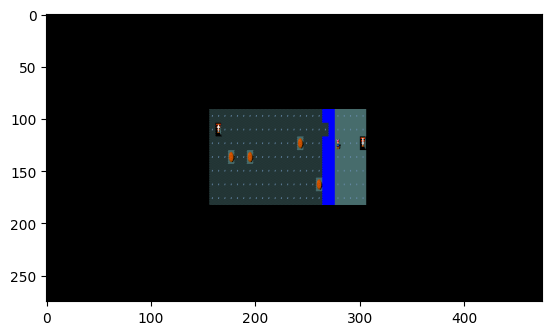

In [5]:
image = plt.imshow(game[25:300, :475])
prev_player_position = get_player_location(game_map)
player_positions = []
for action in [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, :])
    player_positions.append(get_player_location(game_map))
    time.sleep(0.5)

# Nostro River

In [6]:
from minihack import MiniHackNavigation, LevelGenerator
from minihack.envs import register

def new_init_(self, *args, **kwargs):
        kwargs["max_episode_steps"] = kwargs.pop("max_episode_steps", 350)
        n_monster = kwargs.pop("n_monster", 0)
        n_boulder = kwargs.pop("n_boulder", 5)
        narrow = kwargs.pop("narrow", False)
        lava = kwargs.pop("lava", False)

        if narrow:
            map = """
....................W....
....................W....
....................W....
....................W....
....................W....
....................W....
....................W....
"""
        elif not lava:
            map = """
..................WWW....
..................WWW....
..................WWW....
..................WWW....
..................WWW....
..................WWW....
..................WWW....
"""
        else:
            map = """
..................LLL....
..................LLL....
..................WWW....
..................LLL....
..................WWW....
..................LLL....
..................LLL....
"""

        lvl_gen = LevelGenerator(map=map)
        lvl_gen.set_start_rect((0, 0), (18, 6))

        for _ in range(n_monster):
            lvl_gen.add_monster()

        lvl_gen.set_area_variable(
            "$boulder_area", type="fillrect", x1=1, y1=1, x2=18, y2=5
        )
        for _ in range(n_boulder):
            lvl_gen.add_object_area(
                "$boulder_area", name="boulder", symbol="`"
            )

        lvl_gen.add_goal_pos((24, 2))

        MiniHackNavigation.__init__(self, *args, des_file=lvl_gen.get_des(), **kwargs)



minihack.envs.river.MiniHackRiver.__init__ = new_init_  # This is monkey patching.


In [7]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                 ........  ...}                                 
                                  `.......  ..}                                 
                                  ........  ..}                                 
                                    .......`..}                                 
                          .

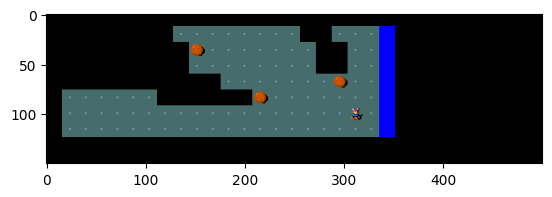

In [8]:
plt.imshow(state['pixel'][100:250, 400:900]) #Immagine ristretta con range [y][x]

In [9]:
game_map = state['chars']
game = state['pixel']

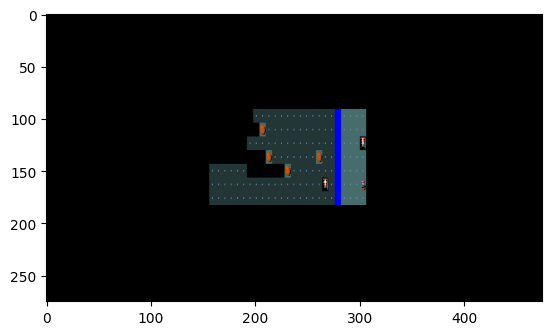

In [10]:
image = plt.imshow(game[25:300, :475])
prev_player_position = get_player_location(game_map)
player_positions = []
for action in [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]:
    s, _, _, _ = env.step(action)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    image.set_data(s['pixel'][:, :])
    player_positions.append(get_player_location(game_map))
    time.sleep(0.5)

# Creare ambiente con des-file

In [2]:
# Importing helper visualisation functions
from minihack.tiles.rendering import get_des_file_rendering

import IPython.display
def render_des_file(des_file, **kwargs):
    image = get_des_file_rendering(des_file, **kwargs)
    IPython.display.display(image)

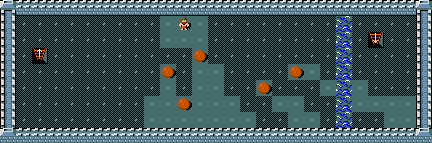

In [73]:
des_file = """
MAZE: "mylevel", ' '
FLAGS: premapped
GEOMETRY: center, center
MAP
|-------------------------|
|....................}....|
|....................}....|
|....................}....|
|....................}....|
|....................}....|
|....................}....|
|....................}....|
|-------------------------|
ENDMAP
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,19,06))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,19,06))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,19,06))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,19,06))
OBJECT:('`', "boulder"), rndcoord(fillrect(01,01,19,06))
LADDER: rndcoord(fillrect(01,01,19,06)), up
LADDER: rndcoord(fillrect(22,01,25,06)), down
"""
render_des_file(des_file, n_images=1, full_screen=False)